# Drug Discovery Project

In [2]:
# Import
import pandas as pd
import numpy as np
from pathlib import Path

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [4]:
DATA = Path('../dataset/13321_2017_226_MOESM1_ESM/')
NB_DIR = Path.cwd()
LOCALDATA = NB_DIR/'..'/'dataset'/'temp'
#df = pd.read_csv('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl.csv', index_col=0)

In [5]:
#df.head()
list(DATA.iterdir())

[PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL1978_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL240_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/RdkitDescriptors.py'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL219_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL218_cl_ecfp_1024.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL301_cl.csv'),
 PosixPath('../dataset/13321_2017_226_MOESM1_ESM/CHEMBL244_cl.csv')]

# RdkitDescriptors

In [6]:
rdkitdes = str(DATA) + '/RdkitDescriptors.py'

In [7]:
# function for returning fingerprint from a specific smile.

def get_fp(smile, diam = 2, bits = 1024, verbose = 0):

    mol = Chem.MolFromSmiles(smile)
    Chem.SanitizeMol(mol)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, diam, nBits = bits)
    
    if verbose:
        print(f"Smile: {smile} ")
        display(mol)
        
    return fp

Smile: S(=O)(=O)(N)c1ccc(cc1)CCNc1nc(nc(n1)NC)NC 


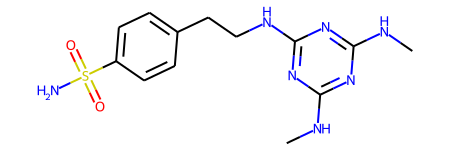

CPU times: user 9.34 ms, sys: 1.45 ms, total: 10.8 ms
Wall time: 10.3 ms


In [8]:
%%time
fp = get_fp(
            smile = "S(=O)(=O)(N)c1ccc(cc1)CCNc1nc(nc(n1)NC)NC",
            diam = 2,
            bits = 1024,
            verbose = 1
            )

In [17]:
#ECFP4
#Generated Circular fingerprints hashed into n bits length vectors.

def ECFP(ifile, ofile, diam, bits):
    
    print(f"Reading data from file: {ifile}")
    df = pd.read_csv(ifile)
    print(f"Headers: {list(df.columns)}")
    
    df.insert(2, "ECFP4_", df.SMILES.apply(get_fp))
    
    df[[f"ECFP4_{i+1}" for i in range(len(df.ECFP4_[0]))]] = df.ECFP4_.to_list()
    
    df.drop("ECFP4_", axis = 1, inplace = True)
    
    
    df.to_csv(DATA/ofile, index = None)
    return df

# Run the functions on a file from dataset and store the results

In [18]:
# ECFP(DATA/'CHEMBL205_cl.csv', './CHEMBL205_cl_ecfp_1024.csv', 2, 1024)

Reading data from file: ../dataset/13321_2017_226_MOESM1_ESM/CHEMBL205_cl.csv
Headers: ['CID', 'SMILES', 'Activity']


,CID,SMILES,Activity,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,...,ECFP4_1015,ECFP4_1016,ECFP4_1017,ECFP4_1018,ECFP4_1019,ECFP4_1020,ECFP4_1021,ECFP4_1022,ECFP4_1023,ECFP4_1024
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17936,CHEMBL1257629,Clc1ccc(cc1)CC([NH3+])C(=O)N1CCN(CC1)c1ncnc2c1...,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17937,CHEMBL1340447,[O-][NH+]([O-])c1c(nc(nc1N)Nc1cc(ccc1)C)N1CC(C...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
17938,CHEMBL213004,Clc1ccc(cc1)/C(=N/OC)/C(C[NH+]1CCN(CC1)c1ncccc1)C,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17939,CHEMBL1384384,S(=O)(=O)(N1CCOCC1)c1cc(NC(=O)COc2cc(ccc2)CC)c...,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df = pd.read_csv(DATA/'CHEMBL205_cl_ecfp_1024.csv')

In [20]:
df.head()

,CID,SMILES,Activity,ECFP4_1,ECFP4_2,ECFP4_3,ECFP4_4,ECFP4_5,ECFP4_6,ECFP4_7,...,ECFP4_1015,ECFP4_1016,ECFP4_1017,ECFP4_1018,ECFP4_1019,ECFP4_1020,ECFP4_1021,ECFP4_1022,ECFP4_1023,ECFP4_1024
0,CHEMBL188002,S(=O)(=O)(N)c1cc(N/C(/S)=N\c2cc(C(=O)[O-])c(cc...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL364127,Clc1ccc(cc1)C(=O)NC1Cc2cc(S(=O)(=O)N)ccc2C1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,CHEMBL1683469,S(=O)(=O)(N)c1ccc(cc1)CNS(=O)(=O)CC12CCC(CC1=O...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,CHEMBL52564,Oc1ccccc1\C=C\C(=O)[O-],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL21427,OB(O)c1ccc(OC)cc1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
